## Load necessary modules

In [1]:
!nvidia-smi

Tue Sep 17 09:27:23 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!pip install -q keras
!pip install -q pandas
!pip install -q numpy
!pip install -q tensorflow
!pip install -U -q PyDrive

from google.colab import drive
drive.mount('/content/drive')

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 10, in <module>
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/__init__.py", line 77, in main


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



    return command.main(cmd_args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/cli/base_command.py", line 152, in main
    user_log_file=options.log,
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/utils/logging.py", line 389, in setup_logging
    "level": vendored_log_level
  File "/usr/lib/python3.6/logging/config.py", line 802, in dictConfig
    dictConfigClass(config).configure()
  File "/usr/lib/python3.6/logging/config.py", line 545, in configure
    formatters[name])
  File "/usr/lib/python3.6/logging/config.py", line 656, in configure_formatter
    result = self.configure_custom(config)
  File "/usr/lib/python3.6/logging/config.py", line 475, in configure_custom
    result = c(**kwargs)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/utils/logging.py", line 124, in __init__
    super(IndentingFormatter, self).__init__(*args, **kwargs)
KeyboardInterrupt
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPy

KeyboardInterrupt: ignored

In [0]:
import os
os.chdir("drive/My Drive/colab_datas/teknofest/keras-retinanet")

In [0]:
len(os.listdir("photos/test_images"))

In [0]:
!pip install -q keras_resnet

In [0]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time
import glob
import pandas as pd
# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf
from tqdm import tqdm

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

In [0]:
import json
with open("photos/data.json","r") as json_file:
    data=json.load(json_file)
data_df=pd.DataFrame(data)

In [0]:
#down_data={}
#for row in tqdm(data.values):
#    path_to_image="photos/test_images/"+str(row[0])+".jpg"
#    down_data[path_to_image]=row[1]
#down_data
#import requests
#for key in tqdm(down_data.keys()):
#    path_to_image=key
#    r = requests.get(down_data[key])
#    open(path_to_image, 'wb').write(r.content)

In [0]:
#import requests
#not_downloaded=[]
#for row in tqdm(data.values):
#    path_to_image="photos/test_images/"+str(row[0])+".jpg"
#    Picture_request = requests.get(row[1])
#    if Picture_request.status_code == 200:
#        with open(path_to_image, 'wb') as f:
#            f.write(Picture_request.content)
#    else:
#        not_downloaded.append(row)
#

In [0]:
val_set=glob.glob("photos/test_images/*")
len(val_set) #should equal to 4349

In [0]:
# val_set=glob.glob("photos/t3_new_data/*/*")

## Random 50 prediction

In [0]:
val_sample=np.random.choice(val_set,150)
labels_to_names = {0: 'yaya', 1: 'arac'}

In [0]:
# !python keras_retinanet/bin/convert_model.py ./snapshots/resnet152_csv_07.h5 ./snapshots/infer_model.h5
# model = models.load_model("./snapshots/infer_model.h5", backbone_name='resnet152')
# resnet152_images=[]
# for i in val_sample:# load image
#     image = read_image_bgr(i)

#     # copy to draw on
#     sha=image.shape
#     draw = image.copy()
#     draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

#     # preprocess image for network
#     image = preprocess_image(image)
#     image, scale = resize_image(image)

#     # process image
#     start = time.time()
#     boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
#     print("processing time: ", time.time() - start)
#     print(i)
#     # correct for image scale
#     boxes /= scale
#     #for j in val_csv.loc[val_csv[0]==i].values:
#     #    draw_box(draw, j[1:5], color=[0,255,0])
#     #    draw_caption(draw, (j[1],j[4]+30), j[5])
#     # visualize detections
#     for box, score, label in zip(boxes[0], scores[0], labels[0]):
#         # scores are sorted so we can break
#         if score < 0.5:
#             break
#         color = label_color(label)

#         b = box.astype(int)
#         draw_box(draw, b, color=color)
        
#         caption = "{} {:.3f}".format(labels_to_names[label], score)
#         draw_caption(draw, b, caption)
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     cv2.putText(draw,'resnet152',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
#     resnet152_images.append(draw)
# !python keras_retinanet/bin/convert_model.py ./snapshots/resnet101_csv_06.h5 ./snapshots/infer_model.h5
# model = models.load_model("./snapshots/infer_model.h5", backbone_name='resnet101')
# resnet101_images=[]
# for i in val_sample:# load image
#     image = read_image_bgr(i)

#     # copy to draw on
#     sha=image.shape
#     draw = image.copy()
#     draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

#     # preprocess image for network
#     image = preprocess_image(image)
#     image, scale = resize_image(image)

#     # process image
#     start = time.time()
#     boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
#     print("processing time: ", time.time() - start)
#     print(i)
#     # correct for image scale
#     boxes /= scale
#     #for j in val_csv.loc[val_csv[0]==i].values:
#     #    draw_box(draw, j[1:5], color=[0,255,0])
#     #    draw_caption(draw, (j[1],j[4]+30), j[5])
#     # visualize detections
#     for box, score, label in zip(boxes[0], scores[0], labels[0]):
#         # scores are sorted so we can break
#         if score < 0.5:
#             break
#         color = label_color(label)

#         b = box.astype(int)
#         draw_box(draw, b, color=color)
        
#         caption = "{} {:.3f}".format(labels_to_names[label], score)
#         draw_caption(draw, b, caption)
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     cv2.putText(draw,'resnet101',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
#     resnet101_images.append(draw)

# Epoch 00001: saving model to ./snapshots/resnet50_csv_01.h5

!python keras_retinanet/bin/convert_model.py ./snapshots_woconfig/resnet50_csv_13.h5 ./snapshots/infer_model.h5
model = models.load_model("./snapshots/infer_model.h5", backbone_name='resnet50')
resnet50_images=[]
for i in val_sample:# load image
    image = read_image_bgr(i)

    # copy to draw on
    sha=image.shape
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image,max_side=3000)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)
    print(i)
    # correct for image scale
    boxes /= scale
    #for j in val_csv.loc[val_csv[0]==i].values:
    #    draw_box(draw, j[1:5], color=[0,255,0])
    #    draw_caption(draw, (j[1],j[4]+30), j[5])
    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.5:
            break
        color = label_color(label)

        b = box.astype(int)
        draw_box(draw, b, color=color)
        
        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)
    # font = cv2.FONT_HERSHEY_SIMPLEX
    # cv2.putText(draw,'resnet50',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
    resnet50_images.append(draw)
os.mkdir("son_train_woaug")
for i in range(len(resnet50_images)):
    image_=cv2.cvtColor(resnet50_images[i],cv2.COLOR_BGR2RGB)
    cv2.imwrite("son_train_woaug/{}.jpg".format(i),image_)
    # plt.figure(figsize=(20, 20))
    # plt.axis('off')
    # plt.imshow(image)
    # plt.show()
    # plt.pause(0.01)

Using TensorFlow backend.


2019-09-16 05:42:29.312057: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-09-16 05:42:29.312481: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2105640 executing computations on platform Host. Devices:
2019-09-16 05:42:29.312518: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-09-16 05:42:29.314605: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-09-16 05:42:29.316878: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2019-09-16 05:42:29.316948: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 8dc9b622b626
2019-09-16 05:42:29.316965: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 8dc9b622b626
2019-09-16 05

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


processing time:  1.210545301437378
photos/test_images/1022.jpg
processing time:  0.3550074100494385
photos/test_images/497.jpg
processing time:  0.3877284526824951
photos/test_images/3314.jpg
processing time:  0.32484912872314453
photos/test_images/3103.jpg
processing time:  0.3791234493255615
photos/test_images/4047.jpg
processing time:  0.38149547576904297
photos/test_images/3679.jpg
processing time:  0.32079267501831055
photos/test_images/1087.jpg
processing time:  0.3117361068725586
photos/test_images/1535.jpg
processing time:  0.3198974132537842
photos/test_images/2057.jpg
processing time:  0.31757044792175293
photos/test_images/755.jpg
processing time:  0.31366944313049316
photos/test_images/517.jpg
processing time:  0.3184514045715332
photos/test_images/1430.jpg
processing time:  0.3200199604034424
photos/test_images/1669.jpg
processing time:  0.3163456916809082
photos/test_images/1330.jpg
processing time:  0.322298526763916
photos/test_images/5.jpg
processing time:  0.38217401

## Predd reeel

In [0]:
val_sample=val_set[:100]
labels_to_names = {0: 'yaya', 1: 'arac'}
!python keras_retinanet/bin/convert_model.py ./snapshots/resnet50_csv_10.h5 ./snapshots/resnet50_csv_10_infer.h5
model = models.load_model("./snapshots/resnet50_csv_10_infer.h5", backbone_name='resnet50')
resnet50_images=[]
for i in tqdm(val_sample):# load image
    image = read_image_bgr(i)
    sha=image.shape
    image = preprocess_image(image)
    image, scale = resize_image(image,max_side=3000,min_side=1200)
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    boxes /= scale
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score < 0.5:
            break
        b = box.astype(int)
        label_=labels_to_names[label]
        resnet50_images.append([i,b[0],b[1],b[2],b[3],label_,score])
resnet50_images=pd.DataFrame(resnet50_images,columns=["path","x1","y1","x2","y2","label","score"])
resnet50_images.to_csv("resnet50_preds_scaled.csv",index=False)

Using TensorFlow backend.
W0825 07:51:00.794999 140024722167680 deprecation_wrapper.py:119] From keras_retinanet/bin/convert_model.py:40: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0825 07:51:00.795351 140024722167680 deprecation_wrapper.py:119] From keras_retinanet/bin/convert_model.py:42: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-08-25 07:51:00.811649: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-08-25 07:51:00.811963: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x157f800 executing computations on platform Host. Devices:
2019-08-25 07:51:00.812003: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-08-25 07:51:00.814345: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-08-25 07:51:00.816762: E tensorflow/stream_ex

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
100%|██████████| 4349/4349 [1:30:47<00:00,  1.35s/it]


In [0]:
val_sample=val_set
labels_to_names = {0: 'yaya', 1: 'arac'}
!python keras_retinanet/bin/convert_model.py ./snapshots/resnet152_csv_07.h5 ./snapshots/infer_model.h5
model = models.load_model("./snapshots/infer_model.h5", backbone_name='resnet152')
resnet152_images=[]
for i in tqdm(val_sample):# load image
    image = read_image_bgr(i)
    sha=image.shape
    image = preprocess_image(image)
    image, scale = resize_image(image,max_side=3000)
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    boxes /= scale
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score < 0.5:
            break
        b = box.astype(int)       
        label_=labels_to_names[label]
        resnet152_images.append([i,b[0],b[1],b[2],b[3],label_,score])
resnet152_images=pd.DataFrame(resnet152_images,columns=["path","x1","y1","x2","y2","label","score"])
resnet152_images.to_csv("resnet152_preds_scaled.csv",index=False)

!python keras_retinanet/bin/convert_model.py ./snapshots/resnet101_csv_06.h5 ./snapshots/infer_model.h5
model = models.load_model("./snapshots/infer_model.h5", backbone_name='resnet101')
resnet101_images=[]
for i in tqdm(val_sample):# load image
    image = read_image_bgr(i)
    sha=image.shape
    image = preprocess_image(image)
    image, scale = resize_image(image,max_side=3000)
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    boxes /= scale
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score < 0.5:
            break
        b = box.astype(int)       
        label_=labels_to_names[label]
        resnet101_images.append([i,b[0],b[1],b[2],b[3],label_,score])
resnet101_images=pd.DataFrame(resnet101_images,columns=["path","x1","y1","x2","y2","label","score"])
resnet101_images.to_csv("resnet101_preds_scaled.csv",index=False)

!python keras_retinanet/bin/convert_model.py ./snapshots/resnet50_csv_12.h5 ./snapshots/infer_model.h5
model = models.load_model("./snapshots/infer_model.h5", backbone_name='resnet50')
resnet50_images=[]
for i in tqdm(val_sample):# load image
    image = read_image_bgr(i)
    sha=image.shape
    image = preprocess_image(image)
    image, scale = resize_image(image,max_side=3000)
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    boxes /= scale
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score < 0.5:
            break
        b = box.astype(int)       
        label_=labels_to_names[label]
        resnet50_images.append([i,b[0],b[1],b[2],b[3],label_,score])
resnet50_images=pd.DataFrame(resnet50_images,columns=["path","x1","y1","x2","y2","label","score"])
resnet50_images.to_csv("resnet50_preds_scaled.csv",index=False)

!python keras_retinanet/bin/convert_model.py ./snapshots/vgg19_csv_09.h5 ./snapshots/infer_model.h5
model = models.load_model("./snapshots/infer_model.h5", backbone_name='vgg19')
vgg_images=[]
for i in tqdm(val_sample):# load image
    image = read_image_bgr(i)
    sha=image.shape
    image = preprocess_image(image)
    image, scale = resize_image(image,max_side=3000)
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    boxes /= scale
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score < 0.5:
            break
        b = box.astype(int)
        label_=labels_to_names[label]
        vgg_images.append([i,b[0],b[1],b[2],b[3],label_,score])
vgg_images=pd.DataFrame(vgg_images,columns=["path","x1","y1","x2","y2","label","score"])
vgg_images.to_csv("vgg_preds_scaled.csv",index=False)

Using TensorFlow backend.
W0824 12:05:32.481518 139907891099520 deprecation_wrapper.py:119] From keras_retinanet/bin/convert_model.py:40: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0824 12:05:32.481868 139907891099520 deprecation_wrapper.py:119] From keras_retinanet/bin/convert_model.py:42: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-08-24 12:05:32.499367: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-08-24 12:05:32.499702: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x25bf800 executing computations on platform Host. Devices:
2019-08-24 12:05:32.499735: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-08-24 12:05:32.501616: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-08-24 12:05:32.504054: E tensorflow/stream_ex

W0824 12:07:40.139894 140490599196544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
100%|██████████| 4349/4349 [54:06<00:00,  1.39it/s]


Using TensorFlow backend.
W0824 13:02:02.167960 139684805314432 deprecation_wrapper.py:119] From keras_retinanet/bin/convert_model.py:40: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0824 13:02:02.168298 139684805314432 deprecation_wrapper.py:119] From keras_retinanet/bin/convert_model.py:42: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-08-24 13:02:02.185272: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-08-24 13:02:02.185578: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3005800 executing computations on platform Host. Devices:
2019-08-24 13:02:02.185610: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-08-24 13:02:02.187442: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-08-24 13:02:02.189844: E tensorflow/stream_ex

100%|██████████| 4349/4349 [42:45<00:00,  1.76it/s]


Using TensorFlow backend.
W0824 13:46:17.459160 140406229088128 deprecation_wrapper.py:119] From keras_retinanet/bin/convert_model.py:40: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0824 13:46:17.459518 140406229088128 deprecation_wrapper.py:119] From keras_retinanet/bin/convert_model.py:42: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-08-24 13:46:17.476506: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-08-24 13:46:17.476818: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1e8f800 executing computations on platform Host. Devices:
2019-08-24 13:46:17.476853: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-08-24 13:46:17.495627: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-08-24 13:46:17.498078: E tensorflow/stream_ex

100%|██████████| 4349/4349 [31:44<00:00,  2.38it/s]


Using TensorFlow backend.
W0824 14:18:52.724114 139722217162624 deprecation_wrapper.py:119] From keras_retinanet/bin/convert_model.py:40: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0824 14:18:52.724442 139722217162624 deprecation_wrapper.py:119] From keras_retinanet/bin/convert_model.py:42: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-08-24 14:18:52.740602: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-08-24 14:18:52.740907: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2093800 executing computations on platform Host. Devices:
2019-08-24 14:18:52.740940: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-08-24 14:18:52.748373: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-08-24 14:18:52.750968: E tensorflow/stream_ex

100%|██████████| 4349/4349 [58:04<00:00,  1.30it/s]


## Load RetinaNet model

In [0]:
!python keras_retinanet/bin/convert_model.py ./snapshots/resnet50_csv_12.h5 ./snapshots/infer_model.h5
model = models.load_model("./snapshots/infer_model.h5", backbone_name='resnet50')
labels_to_names = {0: 'yaya', 1: 'arac'}

Using TensorFlow backend.
W0823 13:51:50.188720 139665354643328 deprecation_wrapper.py:119] From keras_retinanet/bin/convert_model.py:40: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0823 13:51:50.189150 139665354643328 deprecation_wrapper.py:119] From keras_retinanet/bin/convert_model.py:42: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-08-23 13:51:50.211070: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-08-23 13:51:50.211464: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x18ad800 executing computations on platform Host. Devices:
2019-08-23 13:51:50.211527: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-08-23 13:51:50.214245: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-08-23 13:51:50.217430: E tensorflow/stream_ex

W0823 13:52:37.959259 140109310261120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 13:52:38.200784 140109310261120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0823 13:52:38.357568 140109310261120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 13:52:38.384086 140109310261120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0823 13:52:38.387495 140109310261120 deprecati

In [0]:
os.listdir()

['frame0.jpg',
 '.gitignore',
 'CONTRIBUTORS.md',
 '.travis.yml',
 '.gitmodules',
 'LICENSE',
 'setup.cfg',
 'ISSUE_TEMPLATE.md',
 'README.md',
 'setup.py',
 'vehicules.csv',
 'new_d.csv',
 'new_d (1).csv',
 'item_list.csv',
 't3_new_data.csv',
 'config.ini',
 'nigge',
 'tests',
 'photos',
 'build',
 'keras_retinanet',
 '.git',
 'logs',
 'images',
 'examples',
 'snapshots',
 'keras_retinanet.egg-info',
 'anchor-optimization',
 'dist',
 'Copy of train.csv',
 'valid_old.csv',
 'train_old.csv',
 'semantic.csv',
 'outputs_n',
 'valid.csv',
 'train.csv',
 'train.gsheet',
 'outputs']

## Run detection on example

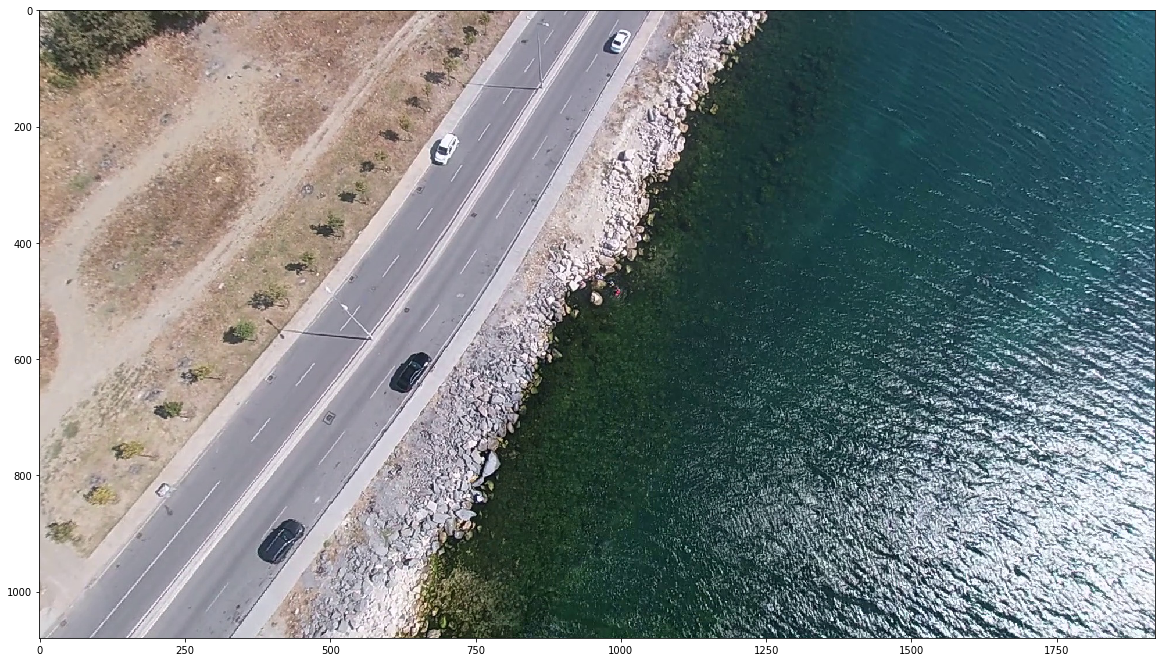

In [0]:
val_sample=np.random.choice(val_set,1)
image = read_image_bgr(val_sample[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 30))
plt.imshow(image)

processing time:  1.0926764011383057
photos/test_images/1032.jpg


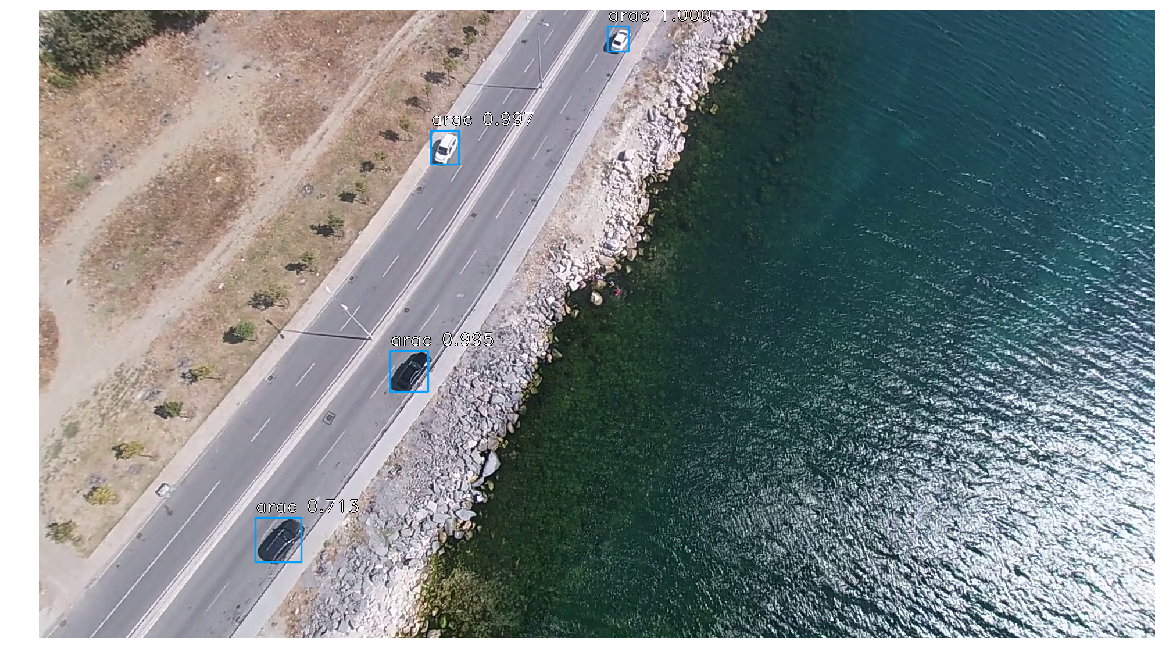

In [0]:
# resnet50_csv_01
for i in val_sample:# load image
    image = read_image_bgr(i)
    sha=image.shape
    # image=cv2.resize(image,(int(sha[1]*1.25),int(sha[0]*1.25)))
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    image = preprocess_image(image)
    image, scale = resize_image(image)
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)
    print(i)
    boxes /= scale

    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.5:
            break
        color = label_color(label)

        b = box.astype(int)
        draw_box(draw, b, color=color)
        
        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)
    
    cv2.imwrite("a.jpg",draw)
    plt.figure(figsize=(20,20))
    plt.axis('off')
    plt.imshow(draw)
    plt.show()
    plt.pause(0.01)

In [0]:
os.getcwd()

'/content/drive/My Drive/colab_datas/teknofest/keras-retinanet'

## migga


In [0]:
# train_csv=pd.read_csv("train.csv",header=None)
# train_csv.head()

In [0]:
# val_set=np.random.choice(train_csv[0].value_counts().index,100)
# for path in val_set:
#     image=cv2.imread(path)
#     image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#     unq_df=train_csv.loc[train_csv[0]==path]
#     for bbs in unq_df.values[:,1:]:
#         cv2.rectangle(image,(bbs[0],bbs[1]),(bbs[2],bbs[3]),(255,0,0),3)
#         cv2.putText(image,bbs[-1],(bbs[0],bbs[1]),cv2.FONT_HERSHEY_DUPLEX,2,(0,255,0))
#     plt.figure(figsize=(16,10))
#     plt.imshow(image)
#     plt.pause(0.001)